### Linear model with Past data

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Load data

In [31]:
df = pd.read_csv(r"C:\Users\joshu\OneDrive\Documenten\Universiteit\Machine_Learning\open_data\consumption.csv")
weather_avg = pd.read_csv(r'C:\Users\joshu\OneDrive\Documenten\Universiteit\Machine_Learning\open_data\weather-avg.csv')
weather_min = pd.read_csv(r'C:\Users\joshu\OneDrive\Documenten\Universiteit\Machine_Learning\open_data\weather-min.csv')
weather_max = pd.read_csv(r'C:\Users\joshu\OneDrive\Documenten\Universiteit\Machine_Learning\open_data\weather-max.csv')
info = pd.read_csv(r'C:\Users\joshu\OneDrive\Documenten\Universiteit\Machine_Learning\open_data\addinfo.csv')

Sorting according to "meter_id" index:

In [32]:
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")

""" 
make meter_id the index, if this is not used all data will be
erased because the default index is from 0 to 3248ish.
"""

' \nmake meter_id the index, if this is not used all data will be\nerased because the default index is from 0 to 3248ish.\n'

In [33]:
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])
# in case you want to drop extra rows that were added automatically after using reindex:
# info_sorted.dropna()


In [34]:
brinfo=info_sorted['num_bedrooms']
br_NaNs_number = brinfo.isnull().sum()
print("number of users with+NaN bedroom info = ", brinfo.shape[0])
print("number of users with NaN bedroom info = ", br_NaNs_number)
print("percentage of NaN values in num_bedrooms = ", br_NaNs_number/brinfo.shape[0])
print(np_features.shape)

number of users with+NaN bedroom info =  3248
number of users with NaN bedroom info =  1389
percentage of NaN values in num_bedrooms =  0.42764778325123154
(17826, 5)


In [35]:
# Filling the mean value for the NaN values in num_bedrooms column:
values = {'num_bedrooms' : brinfo.mean()}
info_filled_br = info_sorted.fillna(value = values)
brinfo_filled = info_filled_br['num_bedrooms']
info_filled_br

,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,terraced_house,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,terraced_house,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Load functions

In [6]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end

def get_mean_temp(row,month):
    """
    row: is the row (meter_id) we would like to get the average temperature for.
    month: which month (columns) we would get the average temperature for.
    returns: the average temperature for a specific meter_id for a specific month.
    """
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")

Make list for training
Here we will only use data that has 2 or mor months since we want to use previous data from the user

In [36]:
temps=[]
temps_min=[]
temps_max=[]
En_con=[]
month_arr=[]
br_arr=[]
l_En_con=[]
NaN_t=1200

for i in range(df.shape[0]): # loop over all users
    
    meter=df.iloc[i] # = row number i  
    
    fmf=False;        # first month found
    
    
    for m in range (1,13): # loop over all months
        begin_index, end_index =get_monthi(m)               #get index of beginning and end of month
        month=meter[begin_index:end_index] #data for the month m for the row user (row) i
        row = brinfo_filled[i:i+1]

        # Check if months have numeric values otherwise discard the month for this user.       
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            if fmf:
                #current month
                temps.append(get_mean_temp(weather_avg_sorted.iloc[i:i+1],m))
                temps_min.append(get_mean_temp(weather_min_sorted.iloc[i:i+1],m))
                temps_max.append(get_mean_temp(weather_max_sorted.iloc[i:i+1],m))
                En_con.append(month.mean())
                month_arr.append(m) # = number of data points = the months that passed threshold for each user.
                br_arr.append(row[0])
                #last month
                l_begin_index,l_end_index=get_monthi(m-1)
                last_month=meter[l_begin_index:l_end_index] #load last month
                l_En_con.append(last_month.mean())
            else:
                fmf=True

In [37]:
# converting list to numpy arrays: 
nptemps = np.zeros(len(temps))
nptemps_min = np.zeros(len(temps_min))
nptemps_max = np.zeros(len(temps_max))
npEn_con = np.zeros(len(En_con))
npmonth_arr = np.zeros(len(month_arr))
npl_En_con= np.zeros(len(l_En_con))
npbr_arr = np.zeros(len(br_arr)) #converting it into numpy array.

for i in range(len(temps)):
     nptemps[i] = temps[i]

for i in range(len(temps_min)):
     nptemps_min[i] = temps_min[i]

for i in range(len(temps_max)):
     nptemps_max[i] = temps_max[i]

for i in range(len(En_con)):
     npEn_con[i] = En_con[i]

for i in range(len(month_arr)):
     npmonth_arr[i] = month_arr[i]
        
for i in range(len(En_con)):
     npl_En_con[i] = l_En_con[i]

for i in range(len(br_arr)):
    npbr_arr[i] = br_arr[i]        

In [9]:
nptemps=np.array(temps).ravel()
nptemps_min=np.array(temps_min).ravel()
nptemps_max=np.array(temps_max).ravel()
npEn_con=np.array(npEn_con).ravel()
npmonth_arr=np.array(npmonth_arr).ravel()
npl_En_con=np.array(npl_En_con).ravel()

In [10]:
print(nptemps.shape)
print(nptemps)
print(npEn_con.shape)

(17826,)
[ 4.68104839  4.67513441  6.88306452 ... 12.14726508  6.79166667
  4.76712249]
(17826,)


Plot data

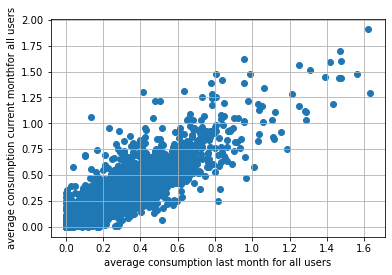

In [11]:
plt.scatter(npl_En_con,npEn_con)
plt.xlabel("average consumption last month for all users")
plt.ylabel("average consumption current monthfor all users")
plt.grid()

Linear model with only last months data

In [12]:
X_train = npl_En_con[:-5347] #70% trainning set
X_train = X_train.reshape(-1,1)

X_test = npl_En_con[-5347:] #  last 6322 elements are the test set
X_test = X_test.reshape(-1,1)

# Split the targets into training/testing sets
y_train = npEn_con[:-5347]
y_train = npEn_con[:-5347].reshape(-1,1)

y_test = npEn_con[-5347:]
y_test = y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[1.07332871]]
Mean squared error: 0.00381149
Coefficient of determination: 0.8186


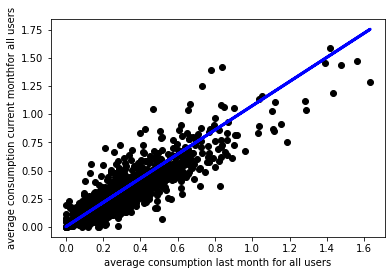

In [13]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("average consumption last month for all users")
plt.ylabel("average consumption current monthfor all users")


plt.show()

Multi linear model with only temperature and last months consumption

In [42]:
np_features= np.zeros(shape = (len(temps), 6))

for i in range(len(temps)):
    np_features[i, 0]  = l_En_con[i]
    np_features[i, 1] = temps[i]
    np_features[i, 2] = temps_min[i]
    np_features[i, 3] = temps_max[i]
    np_features[i, 4] = npbr_arr[i]
    np_features[i, 5] = npmonth_arr[i]


In [39]:
splitnum=5347
# Split the data into training/testing sets
X_train_comb = np_features[:-splitnum]
X_test_comb = np_features[-splitnum:]

# Split the targets into training/testing sets
y_train = npEn_con[:-splitnum]
y_test = npEn_con[-splitnum:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr_comb.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [ 1.05295179e+00 -2.20865597e-04  4.44993627e-03 -5.78521304e-03
  8.04895306e-04]
Mean squared error: 0.00356220
Coefficient of determination: 0.8305


<p><b>Last months energy consumption + avg temps</b></p> 
Coefficients: <br>
 [ 1.05263788 -0.00286312] <br>
Mean squared error: 0.00368155
Coefficient of determination: 0.8248 <br>

<p><b>Last months energy consumption + current month</b></p>  
Coefficients:  <br>
 [1.05802676 0.00715864] <br>
Mean squared error: 0.00297544 <br>
Coefficient of determination: 0.8584 <br>
Using montly information works better then temperature eventhough the Energy consumption per month does not have a linear shape. The coefficient of the months is positive (0.007) months at the end of the year thus contribute to a larger energy consumption. Since needs the previous month to predict the next and the data set is largely empty for the first few months of the year, this linear aproach works good (since me mostly predict months at the end of the year) but for future prediction in januari and febuari, I expect that this will not work since there is a fundamental problem in this approach. Polynomail regression could fix this problem. 
<p><b>Last months energy consumption + avg temps+ min temps+ max temps</b></p> 
Coefficients: <br>
 [ 1.05369861e+00 -2.02758604e-04  4.43279422e-03 -5.78477516e-03]<br>
Mean squared error: 0.00356638<br>
Coefficient of determination: 0.8303<br>
<p><b>Last months energy consumption + avg temps+ min temps+ max temps + months</b></p> 
Coefficients: 
 [ 1.05722162e+00  4.03572227e-03 -3.50359861e-03 -7.92944331e-04
  7.45714064e-03]<br>
Mean squared error: 0.00297577<br>
Coefficient of determination: 0.8584<br>
<p><b>Last months energy consumption+ avg temps+ min temps+ max temps + bedrooms</b></p> 
Coefficients: <br> 
 [ 1.05295179e+00 -2.20865597e-04  4.44993627e-03 -5.78521304e-03
  8.04895306e-04] <br>
Mean squared error: 0.00356220 <br>
Coefficient of determination: 0.8305 <br>

Polynomial regression

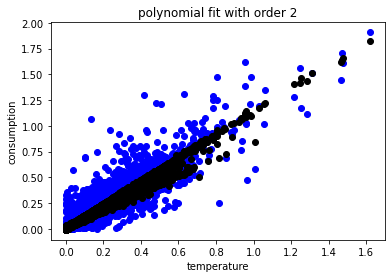

Coefficients: 
 [-2.71002385e-15  3.93995738e-01  1.99227683e-02 -8.56629615e-05
 -2.13317075e-02  2.60835354e-02  3.05516398e-02 -4.64011431e-02
 -4.08377504e-03 -4.07258466e-02  3.54311409e-02 -1.16019607e-03
  5.52195720e-02 -6.60309967e-03  9.08070538e-03  4.47719176e-03
 -5.71597728e-03  2.49792083e-03 -2.77598333e-03 -3.62792960e-03
  3.71250413e-03 -1.98752593e-03 -5.81424718e-04  2.14726519e-03
 -5.62073867e-04 -1.16512225e-03 -1.40194464e-03 -2.37763253e-03]
Mean squared error: 0.00261778
Coefficient of determination: 0.87543028


In [43]:
#Polynomial regression:
splitnum=5347
# Split the data into training/testing sets
X_train_comb = np_features[:-splitnum]
X_test_comb = np_features[-splitnum:]

# Split the targets into training/testing sets
y_train = npEn_con[:-splitnum]
y_test = npEn_con[-splitnum:]


# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_comb) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_comb))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_comb))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_train, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))